<h1 dir="rtl" align="left">
Social Networks HW1 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# Question 2: Generative Graph Models & Genetic Encodings

# **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

from Determinestic_SF_Network import generate_deterministic_scale_free
from RGModel_Network import generate_random_genetic_model

Generating Deterministic Scale-Free Network (b=10, N=1024)...
Graph Generated: 1024 nodes, 6144 edges


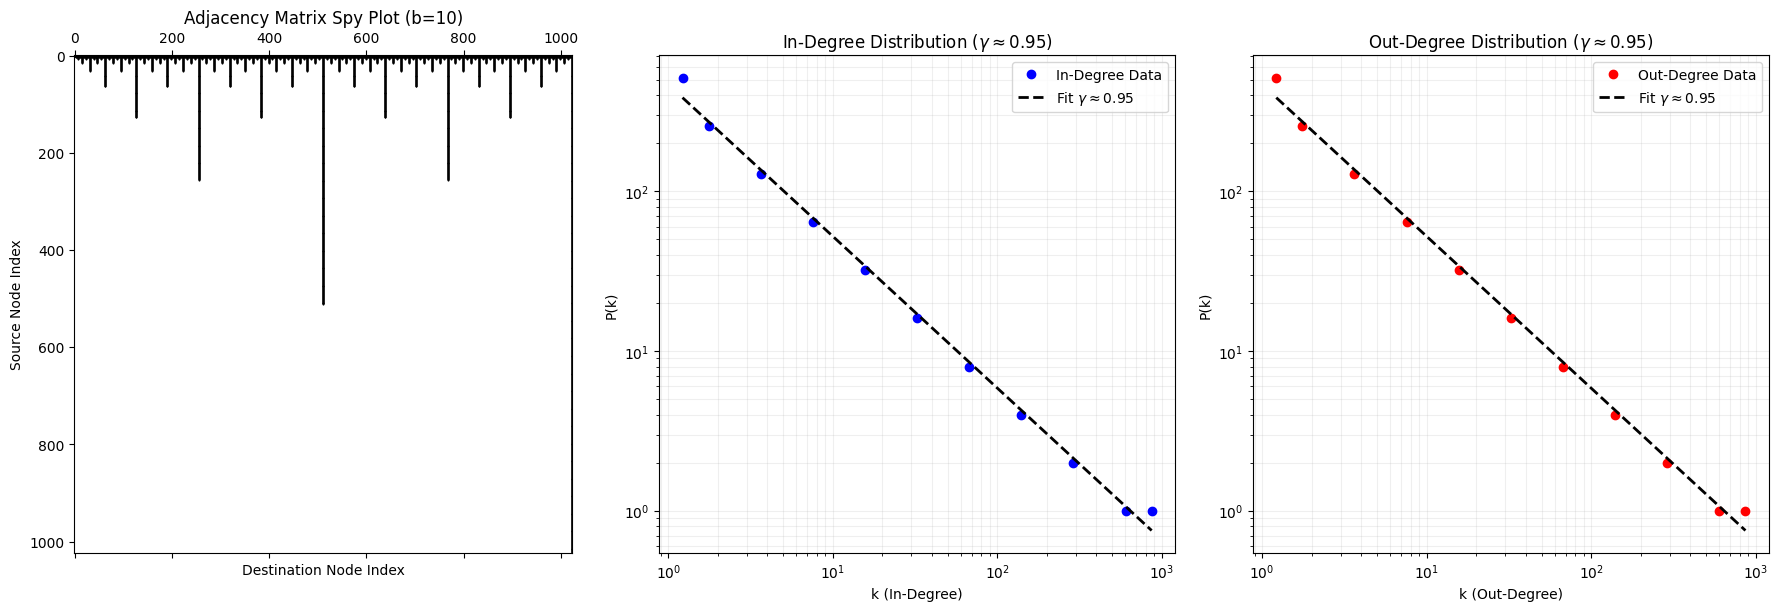

Estimated In-Degree Gamma: 0.950
Estimated Out-Degree Gamma: 0.950


In [2]:
b = 10
print(f"Generating Deterministic Scale-Free Network (b={b}, N={2**b})...")

# Generate Graph
G_det, adj_matrix = generate_deterministic_scale_free(b)
print(f"Graph Generated: {G_det.number_of_nodes()} nodes, {G_det.number_of_edges()} edges")


# Visualization
fig = plt.figure(figsize=(18, 6))

# Adjacency Matrix Heatmap 
ax1 = fig.add_subplot(131)
ax1.spy(adj_matrix, markersize=0.5, color='black')

ax1.set_title(f"Adjacency Matrix Spy Plot (b={b})")
ax1.set_xlabel("Destination Node Index")
ax1.set_ylabel("Source Node Index")


# In-Degree Distribution (Log-Log)
in_degrees = [d for n, d in G_det.in_degree()]
# Use logarithmic bins 
in_hist, in_bins = np.histogram(in_degrees, bins=np.logspace(0, np.log10(max(in_degrees)+1), 20))
in_x = (in_bins[:-1] + in_bins[1:]) / 2
# Filter zeros
mask_in = in_hist > 0
in_x, in_y = in_x[mask_in], in_hist[mask_in]

ax2 = fig.add_subplot(132)
ax2.loglog(in_x, in_y, 'bo', markersize=6, label='In-Degree Data')

# Linear Fit
if len(in_x) > 1:
    slope_in, intercept_in, _, _, _ = linregress(np.log(in_x), np.log(in_y))
    ax2.plot(in_x, np.exp(intercept_in) * (in_x**slope_in), 'k--', linewidth=2, label=f'Fit $\gamma \\approx {-slope_in:.2f}$')
else:
    slope_in = 0

ax2.set_title(f"In-Degree Distribution ($\gamma \\approx {-slope_in:.2f}$)")
ax2.set_xlabel("k (In-Degree)")
ax2.set_ylabel("P(k)")
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

# Out-Degree Distribution (Log-Log)
out_degrees = [d for n, d in G_det.out_degree()]
out_hist, out_bins = np.histogram(out_degrees, bins=np.logspace(0, np.log10(max(out_degrees)+1), 20))
out_x = (out_bins[:-1] + out_bins[1:]) / 2
mask_out = out_hist > 0
out_x, out_y = out_x[mask_out], out_hist[mask_out]

ax3 = fig.add_subplot(133)
ax3.loglog(out_x, out_y, 'ro', markersize=6, label='Out-Degree Data')

# Linear Fit
if len(out_x) > 1:
    slope_out, intercept_out, _, _, _ = linregress(np.log(out_x), np.log(out_y))
    ax3.plot(out_x, np.exp(intercept_out) * (out_x**slope_out), 'k--', linewidth=2, label=f'Fit $\gamma \\approx {-slope_out:.2f}$')
else:
    slope_out = 0

ax3.set_title(f"Out-Degree Distribution ($\gamma \\approx {-slope_out:.2f}$)")
ax3.set_xlabel("k (Out-Degree)")
ax3.set_ylabel("P(k)")
ax3.legend()
ax3.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

print(f"Estimated In-Degree Gamma: {-slope_in:.3f}")
print(f"Estimated Out-Degree Gamma: {-slope_out:.3f}")

**1. Hierarchical Structure in Adjacency Matrix**
The Adjacency Matrix visualization (Spy Plot) displays a striking, regular pattern resembling a "comb" or downward-hanging stalactites, rather than random noise.
*   **Visual Interpretation:** The top row is densely filled, indicating that the primary hub (Node 0, pattern 0000..0) connects to virtually all other nodes. As we move down the indices, we see repeating vertical structures with varying lengths and spacings.
*   **Hierarchical Representation:** This specific geometry visually encodes the **fractal nature** of the network. The pattern is self-similar: the large structure in the center repeats at smaller scales on the sides. This block-like recurrence perfectly illustrates how the hubs are organized in strict tiers—Level 1 hubs connect to the whole network, Level 2 hubs to half, Level 3 to a quarter, and so on.

**2. Power Law Exponent and Topology**
The simulation has a power-law exponent of **$\gamma \approx 0.95$**.

*   This value is significantly lower than the standard Barabási–Albert exponent ($\gamma \approx 3$).
*   The result $\gamma \approx 1$ confirms an extreme **"Winner-Takes-All"** topology.
    *   In standard probabilistic models, "rich get richer" is a tendency, allowing for some diversity.
    *   In this deterministic bit-matching heuristic, the connectivity is dictated by rigid rules. The most significant bits allow specific nodes to capture edges from the entire system deterministically. This creates "Super Hubs" whose degrees grow linearly with the network size ($k_{max} \sim N$), leading to a much flatter distribution slope ($\gamma \to 1$) compared to the steeper slope of random scale-free networks.

Starting Parameter Sweep (b=8, N=256)...
x values: [1 2 3 4 5 6 7 8]
r values: [  2   3   5   6   7  10  12  15  20  25  31  40  50  63  80 100 127 159]
Sweep Complete.


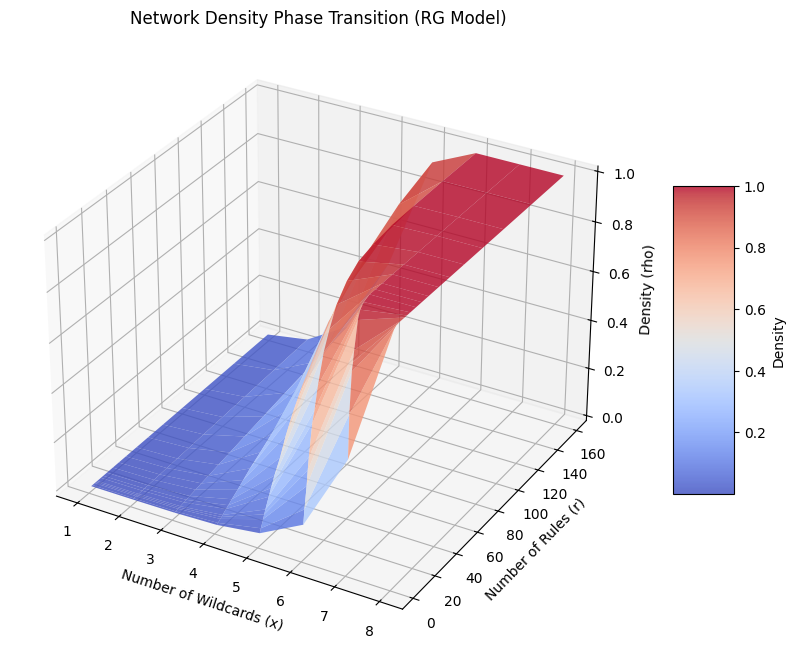

In [5]:
b_rg = 8 
N_rg = 2**b_rg

x_values = np.arange(1, b_rg + 1)
r_values = np.unique(np.logspace(np.log10(2), np.log10(160), num=20).astype(int))

print(f"Starting Parameter Sweep (b={b_rg}, N={N_rg})...")
print(f"x values: {x_values}")
print(f"r values: {r_values}")

# Store results for plotting
X_grid, Y_grid = np.meshgrid(x_values, r_values)
Z_density = np.zeros_like(X_grid, dtype=float)
Z_theoretical = np.zeros_like(X_grid, dtype=float)

# Sweep
for i, r in enumerate(r_values):
    for j, x in enumerate(x_values):
        # Simulation Density
        trials = 3
        densities = []
        for _ in range(trials):
            densities.append(generate_random_genetic_model(b_rg, x, int(r)))
        Z_density[i, j] = np.mean(densities)
        
        # Theoretical Density Formula
        pi = 2.0**(x - b_rg)
        Z_theoretical[i, j] = 1 - (1 - pi**2)**r

print("Sweep Complete.")

# Visualization 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Simulated Surface
surf = ax.plot_surface(X_grid, Y_grid, Z_density, cmap='coolwarm', alpha=0.8, edgecolor='none')

ax.set_title("Network Density Phase Transition (RG Model)")
ax.set_xlabel("Number of Wildcards (x)")
ax.set_ylabel("Number of Rules (r)")
ax.set_zlabel("Density (rho)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Density')

plt.show()

**1. Comparison with Theoretical Formula**
The simulation results match the theoretical prediction given of the formula: $\rho = 1 - (1 - \pi^2)^{2r}$.
*   **Non-Linear Growth:** As shown in the 3D plot, the density does not grow linearly with the number of rules ($r$). Instead, it follows a curve that starts steep and then flattens out.
*   **Saturation:** The plot demonstrates saturation. As $r$ increases (especially for higher values of wildcards $x$), the density reaches a maximum value of 1 (the red surface). At this point, the network becomes a complete graph, and adding more rules cannot increase the density any further.

**2. The Concept of "Rule Overlap"**

*   **Early Stage:** When the network is empty, each new random rule is likely to create edges between pairs of nodes that are not yet connected. This leads to a rapid increase in density of network.
*   **Late Stage:** As the network fills up, new rules increasingly target node pairs that are *already connected* by previous rules. Since multiple edges between the same two nodes can not be applied, these new rules won't effect network density.
*   we eventually need exponentially more rules to fill the few remaining gaps in the network, explaining the saturation effect seen in this simulation.